# LIVER DISEASE PREDICTION

**Importing the Necessary Libraries:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Reading the Dataset:**

In [ ]:
patients=pd.read_csv('indian_liver_patient.csv')

In [ ]:
patients.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,0


**Let us make the Gender column into numerical format:**

In [ ]:
patients.shape

(583, 11)

In [ ]:
patients.replace({"Gender":{"Male":1,"Female":0}},inplace=True)
patients

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,1
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,0
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,0
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,0


**Let us check for the null values:**

In [ ]:
patients.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

**Let us fill these null values by imputing the mean of that column.**

In [ ]:
patients['Albumin_and_Globulin_Ratio'].mean()

0.9470639032815197

In [ ]:
patients=patients.fillna(0.94)

In [ ]:
patients.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

**So Let us start building our model.**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
patients.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

**Now let us define our X and y.**

**Here X is our features and y is our target.**

In [ ]:
X=patients.drop('Dataset',axis=1)
y=patients['Dataset']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

Function to Plot the Confusion Matrix

In [ ]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap();
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(conf_mat,
                   annot=True, # Annot the boxes with conf_mat info
                   cbar=False,
                   cmap = "OrRd")
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label");

### Logistic Regression

Training Accuracy of Logistic Regression Model is 0.6995708154506438
Test Accuracy of Logistic Regression Model is 0.7435897435897436

Confusion Matrix


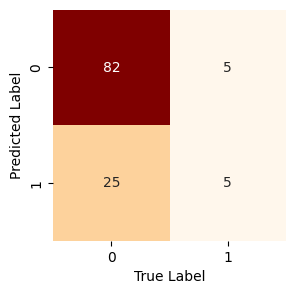

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
np.random.seed(42)

LRmodel= LogisticRegression()
LRmodel.fit(X_train, y_train)

y_preds=LRmodel.predict(X_test)

print(f"Training Accuracy of Logistic Regression Model is {LRmodel.score(X_train,y_train)}")
print(f"Test Accuracy of Logistic Regression Model is {LRmodel.score(X_test,y_test)}")
print("\nConfusion Matrix")
LR_accuracy_score = LRmodel.score(X_test,y_test)

conf_mat = confusion_matrix(y_test, y_preds)
plot_conf_mat(conf_mat)

#### Decision Tree Classifier

Training Accuracy of DecisionTreeClassifier Model is 1.0
Test Accuracy of DecisionTreeClassifier Model is 0.717948717948718

Confusion Matrix


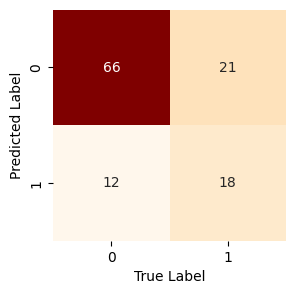

In [ ]:
from sklearn.tree import DecisionTreeClassifier

np.random.seed(42)

dtcModel=DecisionTreeClassifier()

dtcModel.fit(X_train,y_train)
y_preds=dtcModel.predict(X_test)

print(f"Training Accuracy of DecisionTreeClassifier Model is {dtcModel.score(X_train,y_train)}")
print(f"Test Accuracy of DecisionTreeClassifier Model is {dtcModel.score(X_test,y_test)}")
print("\nConfusion Matrix")

DT_accuracy_score = dtcModel.score(X_test,y_test)
conf_mat = confusion_matrix(y_test, y_preds)
plot_conf_mat(conf_mat)

#### Random Forest

Training Accuracy of RandomForestClassifier Model is 1.0
Test Accuracy of RandomForestClassifier Model is 0.7435897435897436

Confusion Matrix


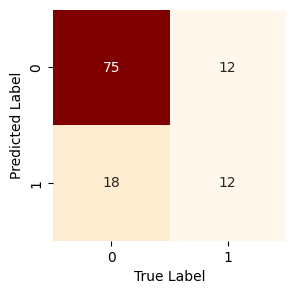

In [ ]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

rfcModel=RandomForestClassifier()

rfcModel.fit(X_train,y_train)
y_preds=rfcModel.predict(X_test)
print(f"Training Accuracy of RandomForestClassifier Model is {rfcModel.score(X_train,y_train)}")
print(f"Test Accuracy of RandomForestClassifier Model is {rfcModel.score(X_test,y_test)}")
print("\nConfusion Matrix")
RF_accuracy_score=rfcModel.score(X_test,y_test)

conf_mat = confusion_matrix(y_test, y_preds)
plot_conf_mat(conf_mat)

In [ ]:
input_data = (65,0,0.7,0.1,187,16,18,6.8,3.3,0.9)
input_data_as_array = np.asarray(input_data)
std_data = input_data_as_array.reshape(1,-1)

# dataset_liver = pd.read_csv('liver.csv')
# dataset_liver.head()


print("Accuracy of Logical Regression Algorithm is ",LR_accuracy_score)
print("Accuracy of Decision Tree Algorithm is ",DT_accuracy_score)
print("Accuracy of Random Forest Algorithm is ",RF_accuracy_score)
highestscore = max(LR_accuracy_score,DT_accuracy_score,RF_accuracy_score)
print("Among the 3 algorithms used Logical Regression algorithm has the highest accuracy score of ",highestscore)
print("Therefore we will use the Logical Regression algorithm for Diabetes_Prediction moving forward \n\n")

print("To test the algorithm we will use an input from the dataset for demonstration")
print(std_data)
prediction = LRmodel.predict(std_data)
print(prediction)
if(prediction == [1]):
  print("\n\n patient has liver disease")
elif(prediction == [0]):
  print("\n\n patient does not have liver disease")

Accuracy of Logical Regression Algorithm is  0.7435897435897436
Accuracy of Decision Tree Algorithm is  0.717948717948718
Accuracy of Random Forest Algorithm is  0.7435897435897436
Among the 3 algorithms used Logical Regression algorithm has the highest accuracy score of  0.7435897435897436
Therefore we will use the Logical Regression algorithm for Diabetes_Prediction moving forward 


To test the algorithm we will use an input from the dataset for demonstration
[[6.50e+01 0.00e+00 7.00e-01 1.00e-01 1.87e+02 1.60e+01 1.80e+01 6.80e+00
  3.30e+00 9.00e-01]]
[0]


 patient does not have liver disease


In [ ]:
import pickle
pickle.dump(rfcModel, open('model_lr_liver.sav','wb'))
loaded_model = pickle.load(open('model_lr_liver.sav','rb'))